# Heuristics of the Normal Distribution 
    - and as a consequence the Central Limit Theorem

In [13]:
# Using PythonDataS2022 conda environment

In [14]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sc

In [15]:
# The below calculations are done on the standard normal distribution (mean=0 & standard deviation=1)

In [16]:
# ppf() is equivalent to a 'One-tail test' on the density plot
# 84% of the data is contained at 1 std deviation.  You could also say the alpha is 0.16
# To view as a `two tail test` then use alpha = 0.08 (aka 0.92 significance interval)

sc.norm.ppf(.84)

0.994457883209753

In [17]:
# 95% of the data is contained at 1.64 std deviation
sc.norm.ppf(.95)

1.6448536269514722

In [18]:
sc.norm.ppf(.975)

1.959963984540054

In [19]:
sc.norm.ppf(.9985)

2.9677379253417944

The two tailed alpha value of 0.16 (aka significance interval of 68.000%) results in a standard deviation of 0.99
The two tailed alpha value of 0.05 (aka significance interval of 90.000%) results in a standard deviation of 1.64
The two tailed alpha value of 0.025 (aka significance interval of 95.000%) results in a standard deviation of 1.96
The two tailed alpha value of 0.0015 (aka significance interval of 99.700%) results in a standard deviation of 2.97


Text(0, 0.5, 'Standard Deviation')

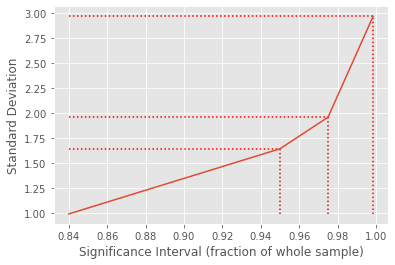

In [20]:
# significance intervals = [68%, 90%, 95%, 99.7%]

# Two tailed alphas
alpha = [0.16, 0.05, 0.025, 0.0015]

# # One tailed alphas
# alpha = [0.32, 0.1, 0.5, 0.003]

std_deviation = []

for i in alpha:
    dev = sc.norm.ppf(1-i)
    std_deviation.append(dev)
    plt.hlines(dev,1-alpha[0],1-i, color="r", linestyle="dotted")
    plt.vlines(1-i,std_deviation[0],dev, color="r", linestyle="dotted")
    print(f'The two tailed alpha value of {i} (aka significance interval of {(1-2*i)*100:0.3f}%) results in a standard deviation of {dev:0.2f}')
    

plt.plot([1-i for i in alpha], std_deviation);
plt.xlabel('Significance Interval (fraction of whole sample)')
plt.ylabel('Standard Deviation')


In [21]:
from datetime import datetime
import random
fig.savefig(f'./images/heuristics_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')

The above shows the 68–95–99.7 rule which states that:
68% of data falls within 1 standard deviation
95% of data falls within 2 standard deviations
99.7% of data falls within 3 standard deviation

One of the assumptions with this is that this is a two sided test.  



The one tailed alpha value of 0.32 (aka significance interval of 68.000%) results in a standard deviation of 0.47
The one tailed alpha value of 0.1 (aka significance interval of 90.000%) results in a standard deviation of 1.28
The one tailed alpha value of 0.05 (aka significance interval of 95.000%) results in a standard deviation of 1.64
The one tailed alpha value of 0.003 (aka significance interval of 99.700%) results in a standard deviation of 2.75


Text(0, 0.5, 'Standard Deviation')

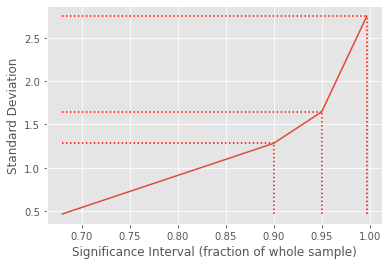

In [10]:
# significance intervals = [68%, 90%, 95%, 99.7%]

# # Two tailed alphas
# alpha = [0.16, 0.05, 0.025, 0.0015]

# One tailed alphas
alpha = [0.32, 0.1, 0.05, 0.003]

std_deviation = []

for i in alpha:
    dev = sc.norm.ppf(1-i)
    std_deviation.append(dev)
    plt.hlines(dev,1-alpha[0],1-i, color="r", linestyle="dotted")
    plt.vlines(1-i,std_deviation[0],dev, color="r", linestyle="dotted")
    print(f'The one tailed alpha value of {i} (aka significance interval of {(1-i)*100:0.3f}%) results in a standard deviation of {dev:.2f}')
    

plt.plot([1-i for i in alpha], std_deviation);
plt.xlabel('Significance Interval (fraction of whole sample)')
plt.ylabel('Standard Deviation')

In [11]:
# this calculates the percent from the standard deviation
sc.norm.cdf(1.64)

0.9494974165258963

This is the std error -1.9599639845400545 at 0.025
This is the std error 1.959963984540054 at 0.975


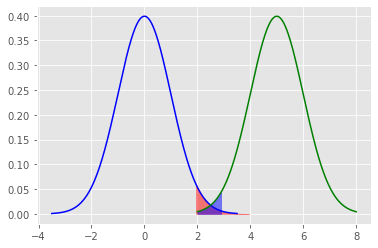

In [12]:
np.random.seed(0)
rand_data = np.random.normal(loc=0, scale=1, size=500)
rand_data_alt = np.random.normal(loc=1.5, scale=1, size=500)

plt.style.use('ggplot')
fig, ax = plt.subplots(1,1)

# standard normal distribution
mean_ho=0
std_ho=1

x_ho=np.linspace(mean_ho-3.5*std_ho, mean_ho+3.5*std_ho,1000)
iq_ho=sc.norm(mean_ho,std_ho)
ax.plot(x_ho,iq_ho.pdf(x_ho),'b')
print(f'This is the std error {iq_ho.ppf(0.025)} at 0.025' )
print(f'This is the std error {iq_ho.ppf(0.975)} at 0.975' )

mean_h1=5
std_h1=1

x_h1=np.linspace(mean_h1-3*std_h1, mean_h1+3*std_h1,1000)
iq_h1=sc.norm(mean_h1,std_h1)
ax.plot(x_h1,iq_h1.pdf(x_h1),'g')

# shows two tailed 95% significance interval (aka 2 std. deviations)
# alpha = 0.025 for each tail
pr=np.arange(1.95,4,0.1)
ax.fill_between(pr,iq_ho.pdf(pr),color='r', alpha=0.5)

# pl=np.arange(-4,-1.95,0.1)
# plt.fill_between(pl,iq.pdf(pl),color='r')

pl_h1=np.arange(2,2.95,0.1)
ax.fill_between(pl_h1,iq_h1.pdf(pl_h1),color='b', alpha=0.5)

# Note 1:  a one tailed test with an alpha=0.05 would have a std. deviation of 1.64
# Note 2:  the significance interval is the area between the two tails.